## Project 1:  Holiday 일때와 아닐때, 매출에 차이가 있는가?

In [1]:
import numpy as np
import pandas as pd

## 1. 데이터 항목(컬럼) 설명
- Store: 지점명
- Dept: 각 지점의 부서명
- Date: 날짜
- Weekly sales: 주별 매출
- IsHoliday: Holiday가 낀 주였는지를 알려주는 칼럼(Boolean)

In [2]:
data = pd.read_csv(r'C:/Users/arimi/Desktop/walmart_2.csv', index_col = 'Date', parse_dates = True)
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-12,1,1,46039.49,True
2010-03-26,1,1,26229.21,False
2010-04-16,1,1,17596.96,False
2010-04-23,1,1,16145.35,False
2010-05-07,1,1,17413.94,False


In [3]:
df = data.copy()
df.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [4]:
df.dtypes

Store             int64
Dept              int64
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [5]:
df.index

DatetimeIndex(['2010-02-12', '2010-03-26', '2010-04-16', '2010-04-23',
               '2010-05-07', '2010-09-10', '2010-11-26', '2010-12-10',
               '2010-12-31', '2011-02-11',
               ...
               '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
               '2012-02-10', '2012-03-02', '2012-05-11', '2012-05-25',
               '2012-09-07', '2012-10-19'],
              dtype='datetime64[ns]', name='Date', length=59322, freq=None)

In [6]:
df.describe()

,Store,Dept,Weekly_Sales
count,59322.000000,59322.000000,59322.000000
mean,22.146354,44.499511,16472.549568
std,12.838143,30.535136,24936.121854
min,1.000000,1.000000,-1008.960000
25%,11.000000,18.000000,2056.082500
50%,22.000000,38.000000,7724.405000
75%,33.000000,74.000000,20648.270000
max,45.000000,99.000000,693099.360000


In [8]:
df2 = df.copy()
df2.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

## 2. 각 store 별로 평균 매출 도출
가정: 각 지점별로, 부서별로 매출은 분명히 다를 것이다. <br>
일단 각 store 별 매출평균은 얼마일까?

In [9]:
df3 = df2.copy()
df3.groupby('Store')['Weekly_Sales'].mean()

Store
1     21578.018176
2     29112.236375
3      6729.792868
4     29542.766586
5      5111.684922
6     22065.874886
7      8771.602866
8     13764.105321
9      9309.134593
10    28804.022935
11    19518.413765
12    15748.604144
13    27994.587713
14    29413.478780
15     9522.928082
16     7953.248237
17    13751.597630
18    15837.204265
19    21123.501439
20    30597.921786
21    11963.613030
22    16396.684154
23    20565.537222
24    19969.469060
25    10491.890169
26    14907.466708
27    25384.960763
28    19584.495198
29     8177.540963
30     8853.836102
31    20171.421470
32    16127.875411
33     5390.603684
34    14110.757785
35    14244.501053
36     8965.519203
37     9970.529391
38     7487.269157
39    21451.977277
40    14291.257671
41    17819.595560
42    11116.544510
43    13654.216708
44     5902.640875
45    12208.413939
Name: Weekly_Sales, dtype: float64

## 3. Weekly sales 기준으로 극단값 제거
모든 데이터에서 Weekly_sales 기준으로 너무 낮은 매출과 너무 높은 매출 제거 <br>
z_sales 칼럼의 z값을 이용하여 전체 데이터 중 상하위 극단값 2.5%씩을 각각 drop <br>

In [10]:
from scipy import stats
df4 = df3.copy()
df4['z_sales'] = stats.zscore(df4['Weekly_Sales'])
df4.head()

,Store,Dept,Weekly_Sales,IsHoliday,z_sales
Date,,,,,
2010-02-12,1,1,46039.49,True,1.185717
2010-03-26,1,1,26229.21,False,0.391269
2010-04-16,1,1,17596.96,False,0.045092
2010-04-23,1,1,16145.35,False,-0.013122
2010-05-07,1,1,17413.94,False,0.037752


In [11]:
df5 = df4.copy()
df5 = df5[df5['z_sales'].between(-2, 2)]
df5.head()

,Store,Dept,Weekly_Sales,IsHoliday,z_sales
Date,,,,,
2010-02-12,1,1,46039.49,True,1.185717
2010-03-26,1,1,26229.21,False,0.391269
2010-04-16,1,1,17596.96,False,0.045092
2010-04-23,1,1,16145.35,False,-0.013122
2010-05-07,1,1,17413.94,False,0.037752


In [12]:
df5.describe()

,Store,Dept,Weekly_Sales,z_sales
count,56719.000000,56719.000000,56719.000000,56719.000000
mean,22.346674,43.573318,12633.483104,-0.153957
std,12.835588,30.048601,14543.194756,0.583223
min,1.000000,1.000000,-1008.960000,-0.701058
25%,11.000000,18.000000,1898.605000,-0.584456
50%,22.000000,36.000000,7019.120000,-0.379109
75%,33.000000,72.000000,18194.970000,0.069074
max,45.000000,99.000000,66327.470000,1.999322


<strong> -> 약 3000건의 데이터가 제거되었다 <strong> 

## 4. holiday True/False 로 groupby

<AxesSubplot:>

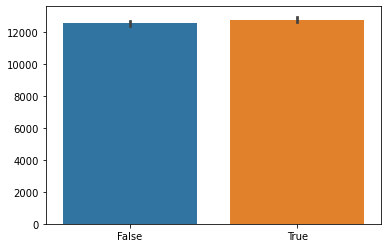

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x = df5['IsHoliday'].values, y = df5['Weekly_Sales'].values)

In [14]:
df5.groupby(df5['IsHoliday'])['Weekly_Sales'].mean()

IsHoliday
False    12511.204679
True     12756.319009
Name: Weekly_Sales, dtype: float64

In [15]:
df5.groupby(df5['IsHoliday'])['Weekly_Sales'].std()

IsHoliday
False    14524.844608
True     14560.828059
Name: Weekly_Sales, dtype: float64

In [16]:
x1 = df5[df5['IsHoliday'] == True]['Weekly_Sales']     # isholiday가 True 일때 weekly sales만 가져옴
x2 = df5[df5['IsHoliday'] == False]['Weekly_Sales']    # isholiday가 False 일때 weekly sales만 가져옴

## 5. 등분산검정을 시행해 0가설 검증

In [17]:
stats.levene(x1, x2)

LeveneResult(statistic=3.397715530498396, pvalue=0.06529199327112786)

## 6. 결과
 -> Holiday True, False 두 조건간 데이터에 대한 등분산 검정 시행 결과 p > .05 이므로, 0가설 기각 불가

<strong> 결론: 매출은 holiday와 관련이 없다 <strong> 